In [2]:
from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from scipy.integrate import quad
from scipy import integrate as intg
import sympy as sp
from scipy import stats
from scipy.interpolate import UnivariateSpline
import pandas as pd
from scipy.stats import linregress
from scipy.stats import norm
import os
import seaborn as sns
from matplotlib import pyplot as plt, patches

rng = np.random.default_rng()


Problem 2 Hw 2


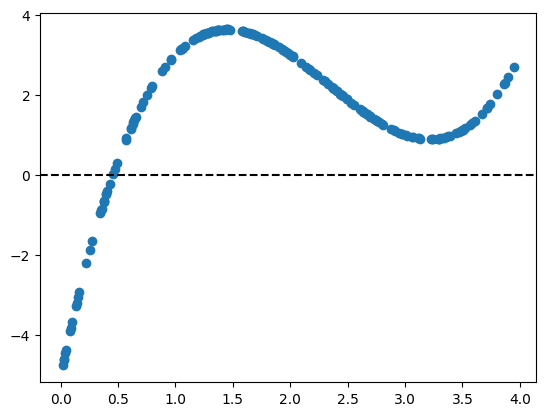

In [3]:

#Here is the function and the 1st derivative of the func
def prob1y(x):
  return (x**3)-(7*(x**2))+(14*x)-5

def prob1dy(x):
    return (3*(x**2)) - (14*x) + 14

#Not sure that we really need to plot, but I want to see what x does at various points of the function.
#integerlist = np.random.randint(1,10,20)
#integerlist = np.random.default_rng((0,10),100)
integerlist = np.random.uniform(low=0, high=4, size=200)
yvallist = []
for i in range (len(integerlist)):
  plotval = prob1y(integerlist[i])
  yvallist.append(plotval)
  #print(plotval)
yvallist1 = np.array(yvallist)
#print (integerlist,yvallist1)

plt.scatter(integerlist,yvallist1)
plt.axhline(y=0, color='k', linestyle='--')

In [22]:
#error min given by prof
errorthres = 1e-8


#below I make the bisection array
bisectarray = []
def bisect(func, x_lower, x_upper, errorthreshold):
    iteration = 0

    if func(x_lower) * func(x_upper) >= 0:
        print("ERROR! Need opposite signs for the two guesses")
        return None, iteration

    #print(f"{'Iter':<5} {'x_lower':<12} {'x_upper':<12} {'midpoint':<12} {'f(mid)':<12}")

    #this while loop is does the majority of the heavy lifting! It "churns" therough each iteration and recalculates the midpoint. Then passes it to the if loop
    while (x_upper - x_lower) / 2.0 > errorthreshold:
        midpoint = (x_lower + x_upper) / 2.0
        iteration += 1


        print(f"{iteration:<5} {x_lower:<12.6f} {x_upper:<12.6f} {midpoint:<12.6f} {func(midpoint):<12.6e}")


        #This if loop is like the step where we look and see whether we replace the higher or lower point
        if func(midpoint) == 0:
            return midpoint, iteration
        elif func(x_lower) * func(midpoint) < 0:
            #print ("replacing Upper with midpoint")
            x_upper = midpoint
        else:
            #print ("replacing Lower with midpoint")
            x_lower = midpoint

    return (x_lower + x_upper) / 2.0, iteration



root_bi, steps_bi = bisect(prob1y, 0, 1, errorthres)
print(f"Bisection Result: x = {root_bi:.9f} in {steps_bi} steps")


1     0.000000     1.000000     0.500000     3.750000e-01
2     0.000000     0.500000     0.250000     -1.921875e+00
3     0.250000     0.500000     0.375000     -6.816406e-01
4     0.375000     0.500000     0.437500     -1.311035e-01
5     0.437500     0.500000     0.468750     1.274109e-01
6     0.437500     0.468750     0.453125     -4.692078e-04
7     0.453125     0.468750     0.460938     6.381369e-02
8     0.453125     0.460938     0.457031     3.175813e-02
9     0.453125     0.457031     0.455078     1.566596e-02
10    0.453125     0.455078     0.454102     7.603751e-03
11    0.453125     0.454102     0.453613     3.568616e-03
12    0.453125     0.453613     0.453369     1.550040e-03
13    0.453125     0.453369     0.453247     5.405003e-04
14    0.453125     0.453247     0.453186     3.566727e-05
15    0.453125     0.453186     0.453156     -2.167650e-04
16    0.453156     0.453186     0.453171     -9.054755e-05
17    0.453171     0.453186     0.453178     -2.743981e-05
18    0

In [11]:


#below is the func for the Newton Rapson method which still doesnt quite work as of 02/19


def newton_raphson(func, firstderiv, x0, errorthreshold):
    iteration = 0
    x_churn = x0
    error = abs(func(x_churn))

    #print(f"\n{'Iter'} {'x_current':<12} {'f(x)':<12} {'f\'(x)':<12}")

    while error > errorthreshold:
        iteration += 1
        fx = func(x_churn)
        dfx = firstderiv(x_churn)

        if dfx == 0:
            print("EROR! divide by zero ): ")
            return None, iteration

        x_new = x_churn - (fx / dfx)
        error = abs(x_new - x_churn)

        print(f"{iteration:<5} {x_churn:<12.6f} {fx:<12.6e} {dfx:<12.6f}")

        x_churn = x_new


    return x_churn, iteration





root_nr, steps_nr = newton_raphson(prob1y, prob1dy, 0, errorthres)
print(f"Newton-Raphson Result: x = {root_nr:.9f} in {steps_nr} steps")

1     0.000000     1.000000     0.500000     3.750000e-01
2     0.000000     0.500000     0.250000     -1.921875e+00
3     0.250000     0.500000     0.375000     -6.816406e-01
4     0.375000     0.500000     0.437500     -1.311035e-01
5     0.437500     0.500000     0.468750     1.274109e-01
6     0.437500     0.468750     0.453125     -4.692078e-04
7     0.453125     0.468750     0.460938     6.381369e-02
8     0.453125     0.460938     0.457031     3.175813e-02
9     0.453125     0.457031     0.455078     1.566596e-02
10    0.453125     0.455078     0.454102     7.603751e-03
11    0.453125     0.454102     0.453613     3.568616e-03
12    0.453125     0.453613     0.453369     1.550040e-03
13    0.453125     0.453369     0.453247     5.405003e-04
14    0.453125     0.453247     0.453186     3.566727e-05
15    0.453125     0.453186     0.453156     -2.167650e-04
16    0.453156     0.453186     0.453171     -9.054755e-05
17    0.453171     0.453186     0.453178     -2.743981e-05
18    0

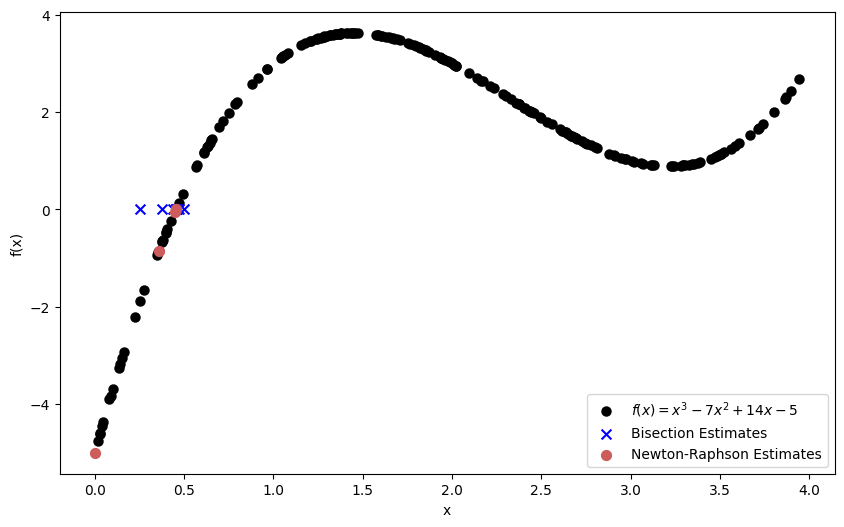

In [9]:
bisection_steps = []
a, b = 0, 1
for _ in range(10):
    mid = (a + b) / 2
    bisection_steps.append(mid)
    if prob1y(a) * prob1y(mid) < 0:
        b = mid
    else:
        a = mid

nr_steps = []
CurrentXval = 0
for _ in range(5):
    nr_steps.append(CurrentXval)
    if prob1dy(CurrentXval) == 0: break
    CurrentXval = CurrentXval - prob1y(CurrentXval) / prob1dy(CurrentXval)


plt.figure(figsize=(10, 6))



plt.scatter(integerlist, yvallist1, label='$f(x) = x^3 - 7x^2 + 14x - 5$', color='black', linewidth=1.5)

plt.scatter(bisection_steps, [0]*len(bisection_steps), color='blue', marker='x', s=50, label='Bisection Estimates', zorder=5)

nr_y_vals = [prob1y(x) for x in nr_steps]
plt.scatter(nr_steps, nr_y_vals, color='#CD5C5C', marker='o', s=50, label='Newton-Raphson Estimates', zorder=6)



plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()


plt.show()

In [ ]:
###Problem 2, part C: Leading my code astray!



# Question 3
